In [10]:
import pandas as pd
df=pd.read_csv(r'german_credit_data.csv')
df=df.dropna()
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,female,2,own,little,moderate,5951,48,radio/TV
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
7,35,male,3,rent,little,moderate,6948,36,car
9,28,male,3,own,little,moderate,5234,30,car


In [11]:
df=pd.get_dummies(df,prefix=['Sex','Housing','Saving Account','Checking account','Purpose'], drop_first=True)
df.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving Account_moderate,Saving Account_quite rich,Saving Account_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
1,22,2,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,35,3,6948,36,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0
9,28,3,5234,30,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0


In [28]:
from sklearn.decomposition import PCA 
pca = PCA(2)  
projected = pca.fit_transform(df)
print(df.shape)
print(projected)

(522, 20)
[[ 2.67231109e+03 -1.68880596e+01]
 [ 4.60329632e+03  7.01909766e+00]
 [ 1.59126247e+03  1.75915550e+01]
 ...
 [ 5.78277434e+02  3.65458311e+00]
 [-1.43368245e+03 -1.58459035e+01]
 [ 1.29730976e+03 -1.16015689e+01]]


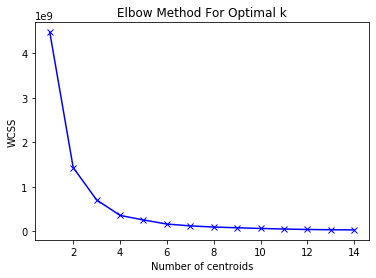

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving Account_moderate,Saving Account_quite rich,Saving Account_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
1,22,2,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,53,2,4870,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,35,3,6948,36,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
9,28,3,5234,30,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,48,1,1743,24,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,2
993,30,3,3959,36,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
996,40,3,3857,30,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
998,23,2,1845,45,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2


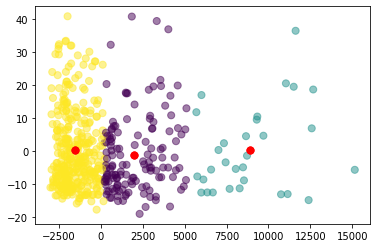

In [27]:
#converting our projected array to pandas df
pca=pd.DataFrame(projected)
pca.columns=['First component','Second Component']

#build our algorithm with k=3, train it on pca and make predictions
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca)
y_kmeans = kmeans.predict(pca)

#plotting the results 
plt.scatter(pca['First component'], pca['Second Component'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

labels = kmeans.labels_
df['Cluster'] = labels
#df['Cluster'].drop_duplicates()
df